In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [5]:
fashion_train_df = pd.read_csv('/content/sample_data/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('/content/sample_data/fashion-mnist_test.csv', sep=',')

In [6]:
fashion_train_df.shape

(471, 785)

In [7]:
fashion_train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [8]:
print(set(fashion_train_df['label']))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [9]:
print([fashion_train_df.drop(labels='label', axis=1).min(axis=1).min(), 
      fashion_train_df.drop(labels='label', axis=1).max(axis=1).max()])

[0.0, 255.0]


In [10]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
fashion_test_df.shape

(10000, 785)

In [12]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


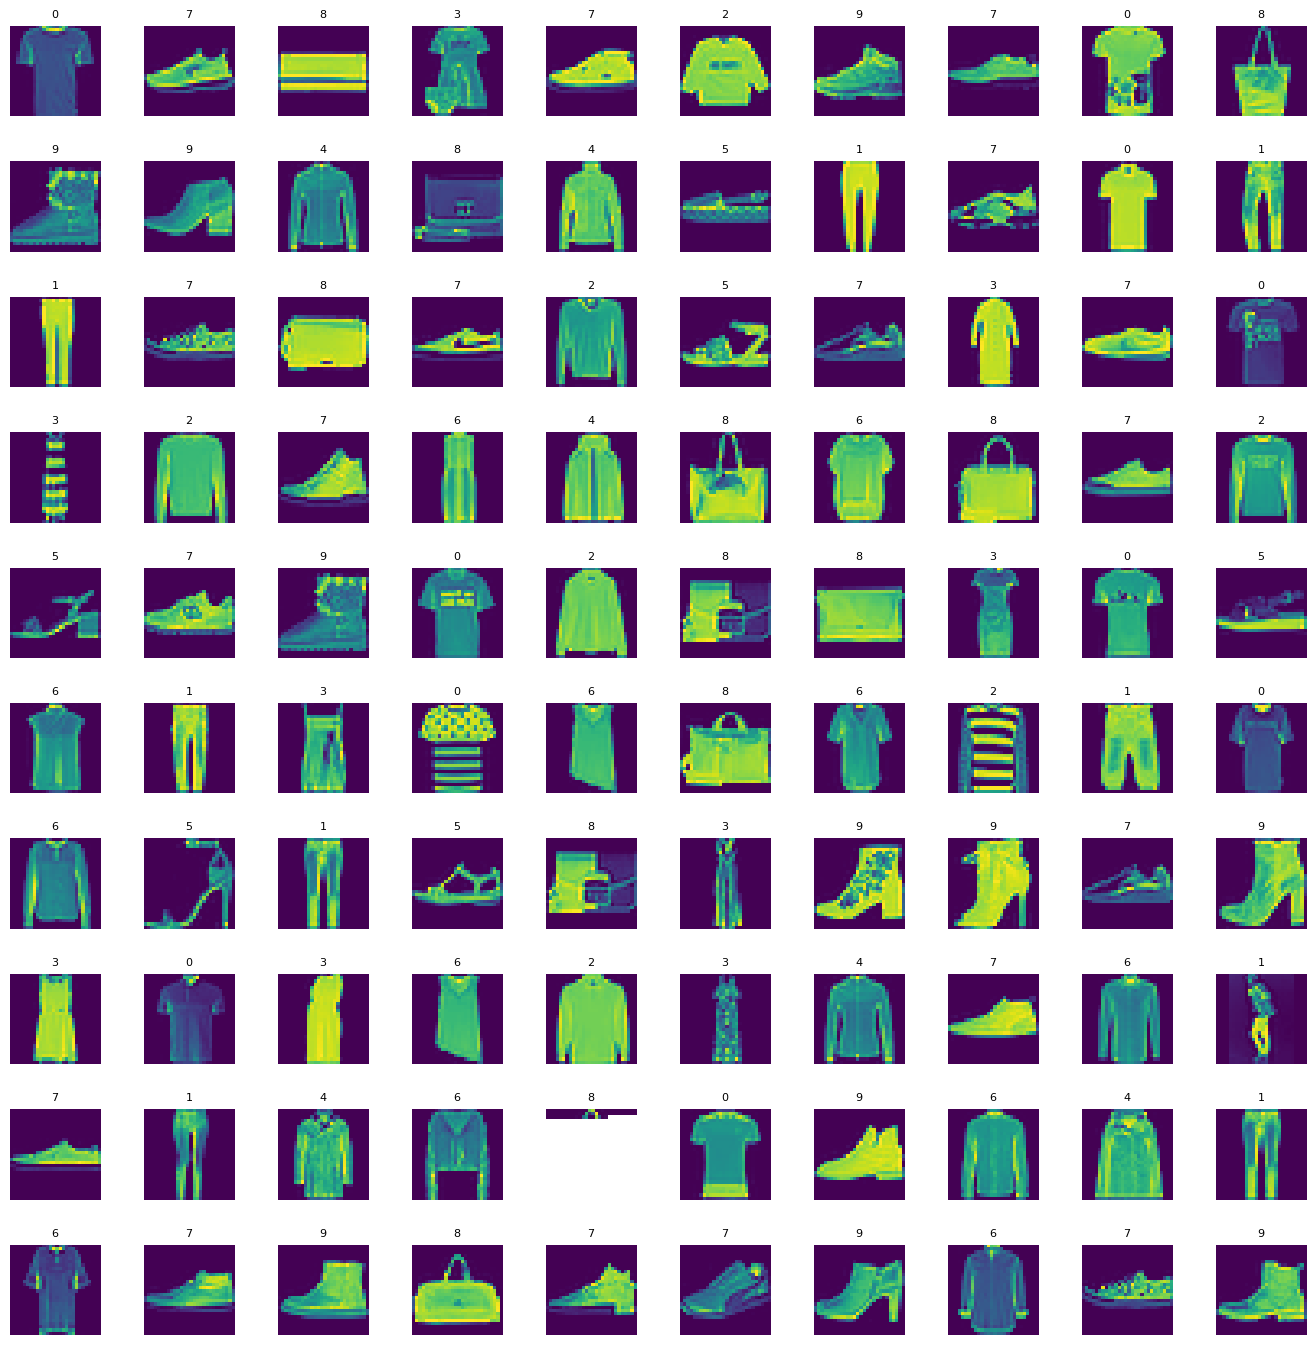

In [17]:
training = np.asarray(fashion_train_df, dtype='float32')

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [21]:
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255
y_test = testing[:, 0]

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)    # TODO : change the random state to 5

In [ ]:
# Lets check the shape of all three datasets
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(38400, 28, 28, 1) (9600, 28, 28, 1) (10000, 28, 28, 1)
(38400,) (9600,) (10000,)


In [35]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [38]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                      

In [39]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: nan - accuracy: 0.0904 - val_loss: nan - val_accuracy: 0.0842
Epoch 2/50
1/1 [==============================] - 0s 363ms/step - loss: nan - accuracy: 0.1064 - val_loss: nan - val_accuracy: 0.0842
Epoch 3/50
1/1 [==============================] - 0s 347ms/step - loss: nan - accuracy: 0.1064 - val_loss: nan - val_accuracy: 0.0842
Epoch 4/50
1/1 [==============================] - 0s 344ms/step - loss: nan - accuracy: 0.1064 - val_loss: nan - val_accuracy: 0.0842
Epoch 5/50
1/1 [==============================] - 0s 316ms/step - loss: nan - accuracy: 0.1064 - val_loss: nan - val_accuracy: 0.0842
Epoch 6/50
1/1 [==============================] - 0s 320ms/step - loss: nan - accuracy: 0.1064 - val_loss: nan - val_accuracy: 0.0842
Epoch 7/50
1/1 [==============================] - 0s 340ms/step - loss: nan - accuracy: 0.1064 - val_loss: nan - val_accuracy: 0.0842
Epoch 8/50
1/1 [==============================] - 0s 323ms/step -

In [40]:
eval_result = cnn_model.evaluate(X_test, y_test)
print("Accuracy : {:.3f}".format(eval_result[1]))

313/313 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.1000
Accuracy : 0.100


In [41]:
y_pred = cnn_model.predict(x=X_test)

313/313 [==============================] - 2s 6ms/step


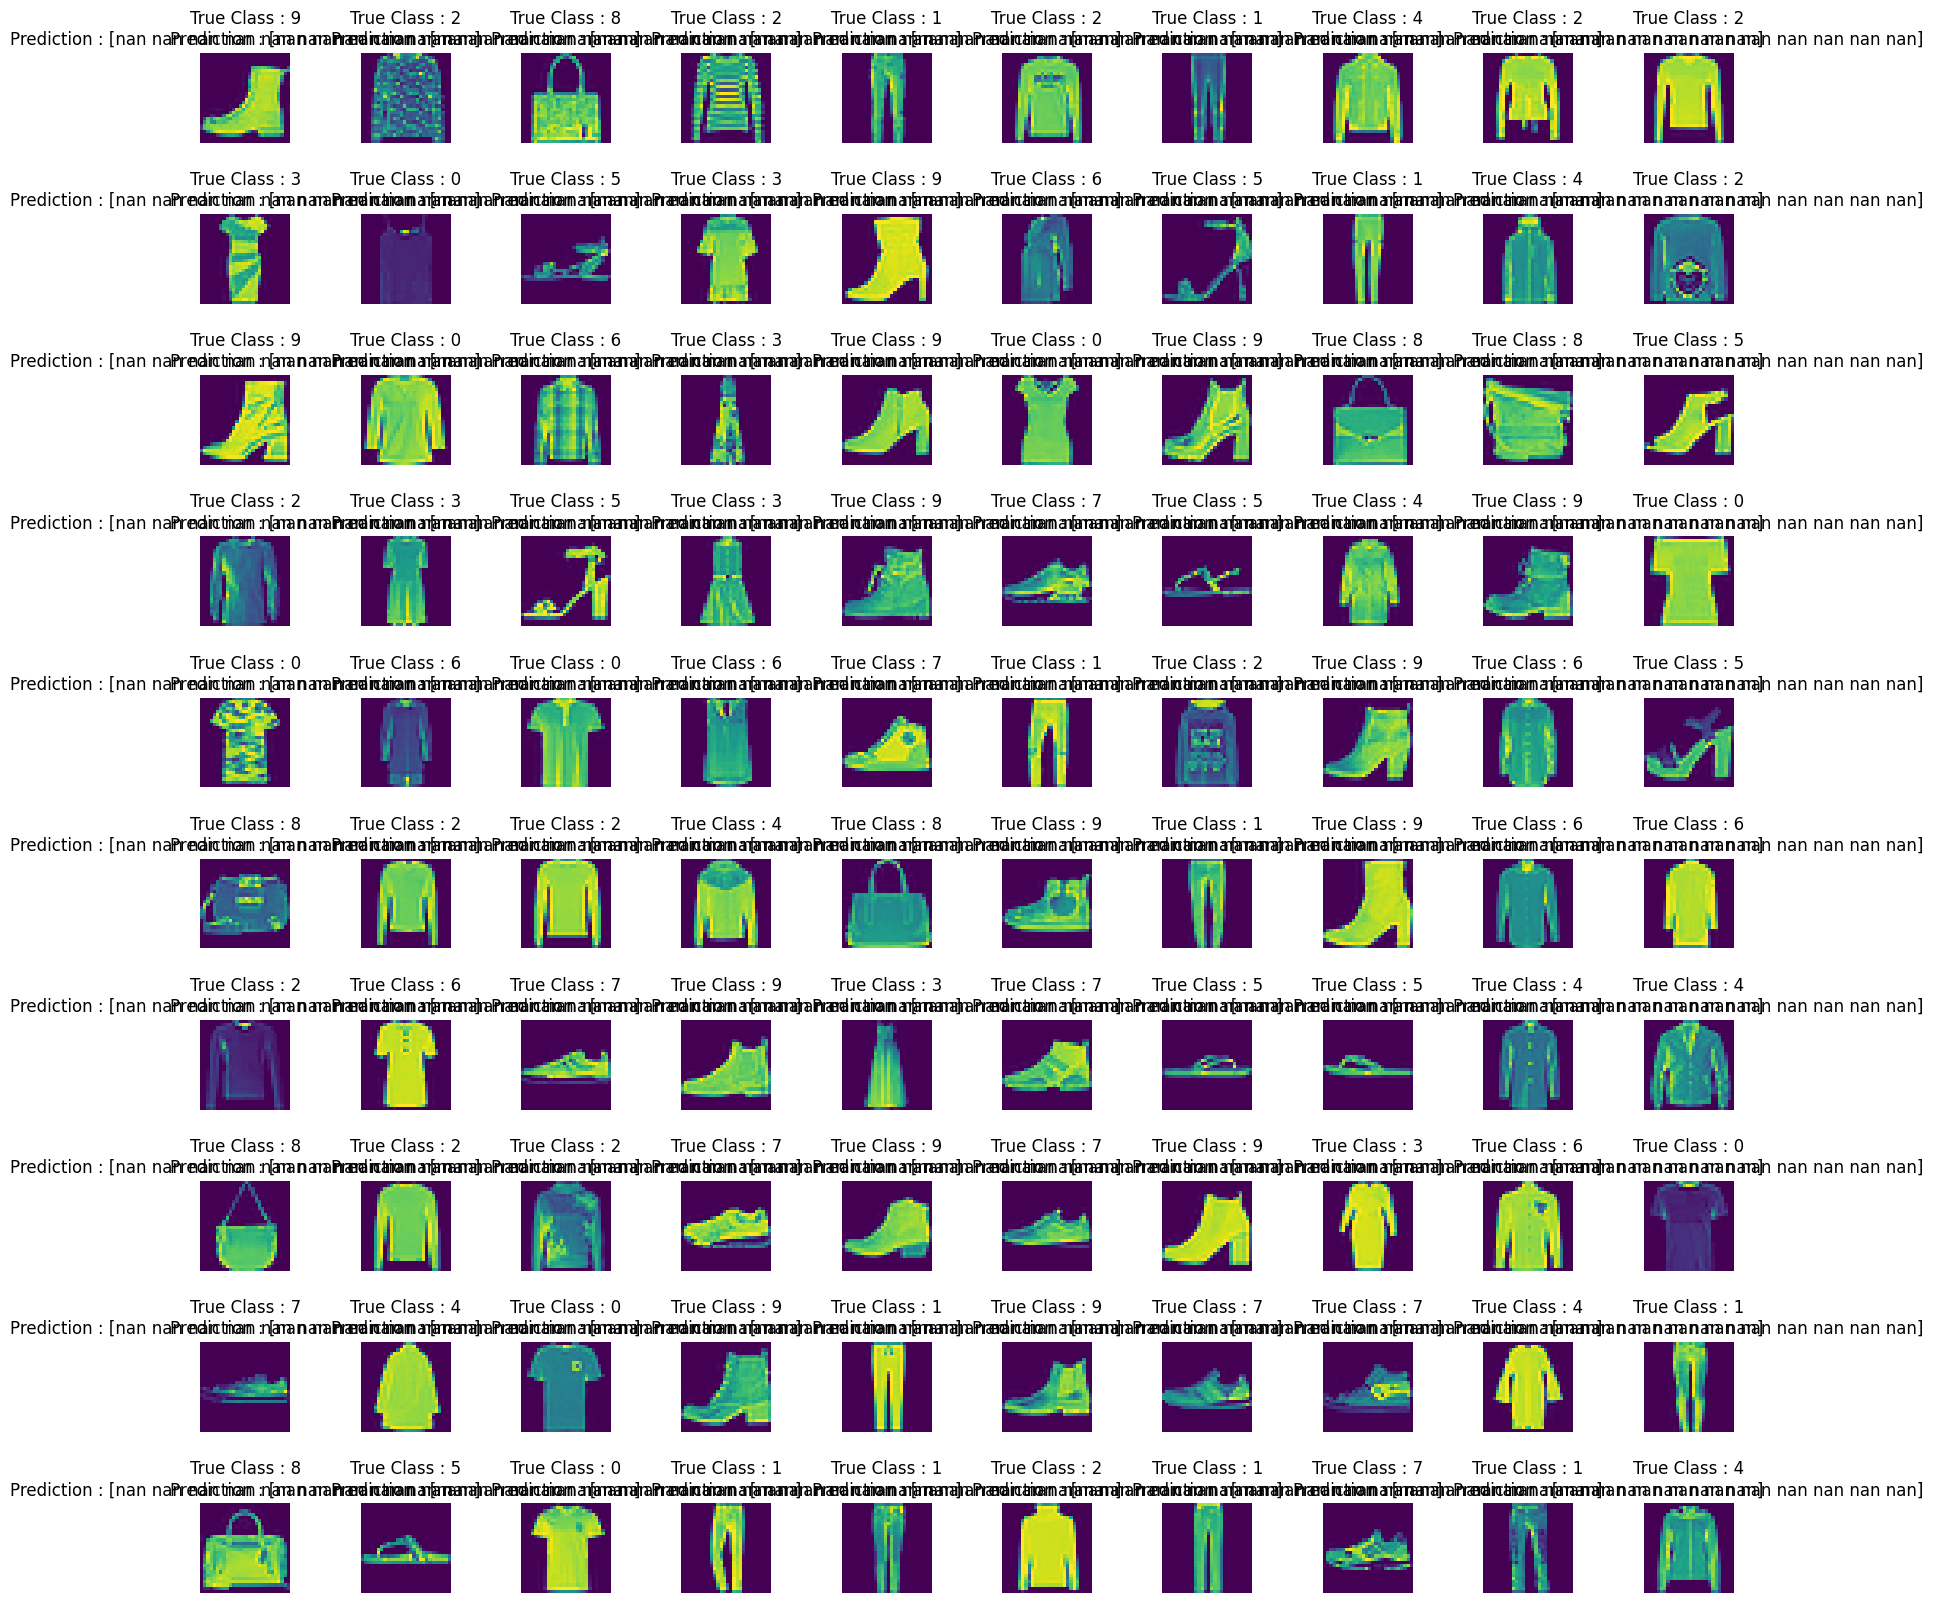

In [42]:
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()
for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.8, wspace=0.5)